### Дисциплина ИИ: Рабочая тетрадь 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import * 
#import scipy as sp
from scipy.optimize import curve_fit

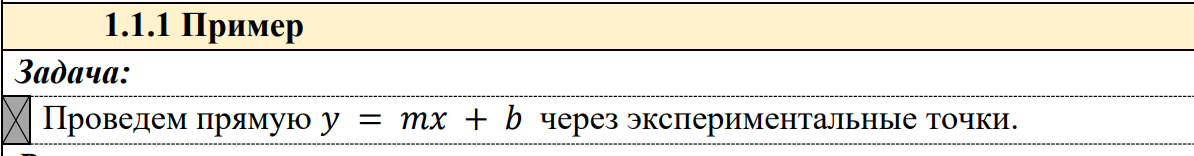

In [2]:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

#перепишем y = mx + b как y = Ap, где A = [[x 1]] p = [[m], [b]]
#построим А по х:

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [3]:
#используем метод lstsq для решения его относительно вектора р
m, b = np.linalg.lstsq(A, y, rcond = None)[0] #lstsq решение наименьших квадратов
print(m, b)

0.9999999999999997 -0.9499999999999992


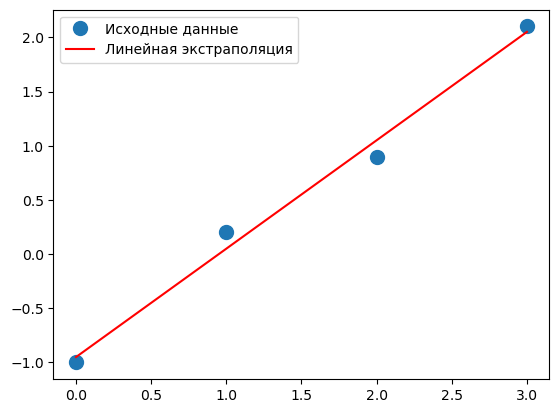

In [4]:
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + b, 'r', label="Линейная экстраполяция")
plt.legend()
plt.show()

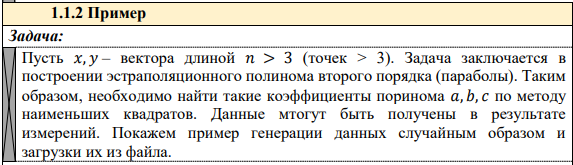

In [5]:
#генерируем случайные х и у
delta = 1.0
x = np.linspace(-5, 5, 11)
y = x**2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

x.tofile("x_data.txt", "\n")
y.tofile("y_data.txt", "\n")

#читаем данные из файла
x = np.fromfile("x_data.txt", float, sep="\n")
y = np.fromfile("y_data.txt", float, sep="\n")

print(x)
print(y)

[-5.25196237 -3.57280019 -3.09327749 -2.43762768 -0.83469121  0.07273781
  0.6928528   2.07905017  3.36410029  4.23690415  5.03314896]
[25.2771396  15.92546962  8.98948695  4.32603298  0.65557028  0.1816508
  0.96556816  3.74531505  8.69079455 16.06599228 24.74671043]


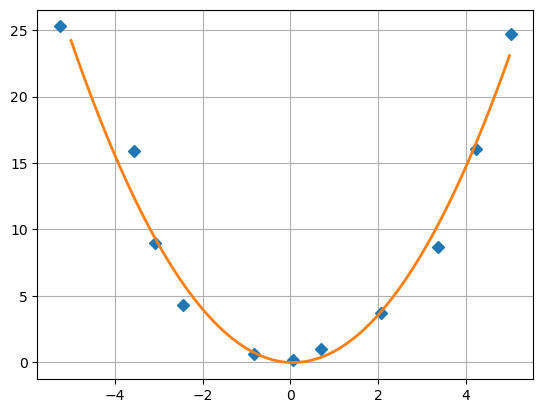

In [6]:
#нахождение коэф-ов функции y = ax^2 + bx + c c методом наименьших квадратов
m = np.vstack((x**2, x, np.ones(11))).T
#находим коэф-ты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

#на отрезке [-5, 5]
x_prec = np.linspace(-5, 5, 101)
plt.plot(x, y, "D") #рисуем точки
#рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэф-ты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('parabola.png')

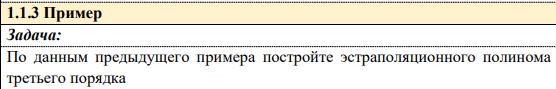

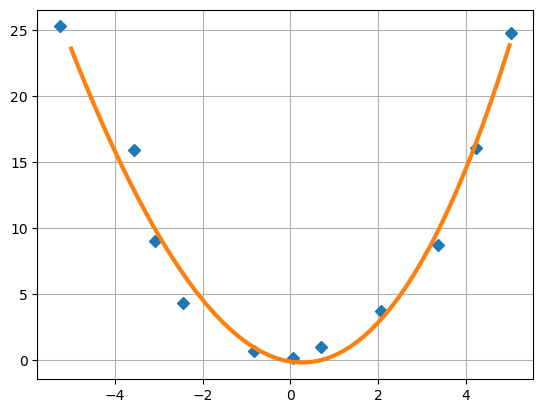

In [7]:
#y = ax^3 + bx^2 + cx + d
m = np.vstack((x**3, x**2, x, np.ones(11))).T #задаем вектор
s = np.linalg.lstsq(m, y, rcond = None)[0] #коэфф при векторе m

x_prec = np.linspace(-5, 5, 101)
plt.plot(x, y, "D") 
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('polynom^3.png')

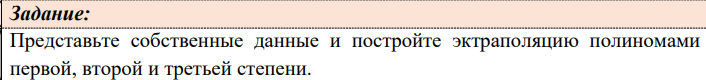

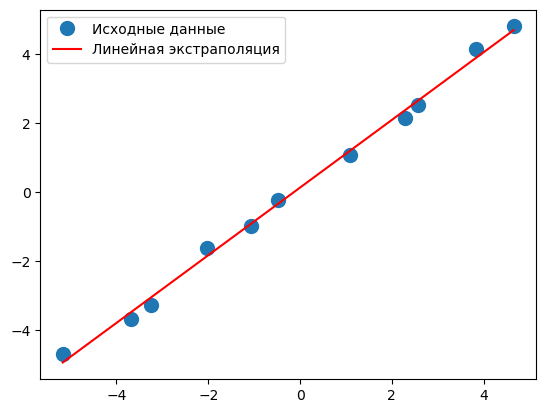

In [8]:
delta = 1.0
x = np.linspace(-5, 5, 11)
y = x + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

A = np.vstack((x, np.ones(11))).T
m, b = np.linalg.lstsq(A, y, rcond = None)[0]

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + b, 'r', label="Линейная экстраполяция")
plt.legend()
plt.show()

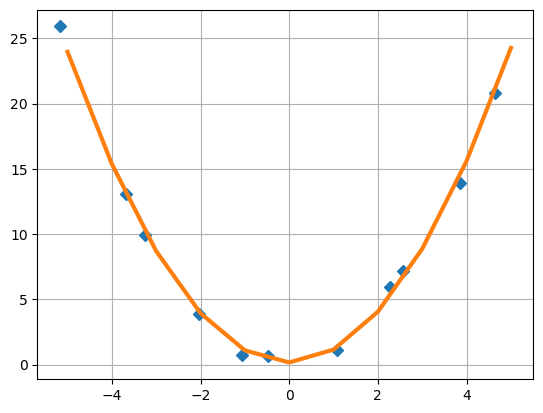

In [9]:
y = x**2 + delta * (rand(11) - 0.5) * x + delta * (rand(11) - 0.5)

m = np.vstack((x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(-5, 5, 11)
plt.plot(x, y, "D")
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=3)
plt.grid()

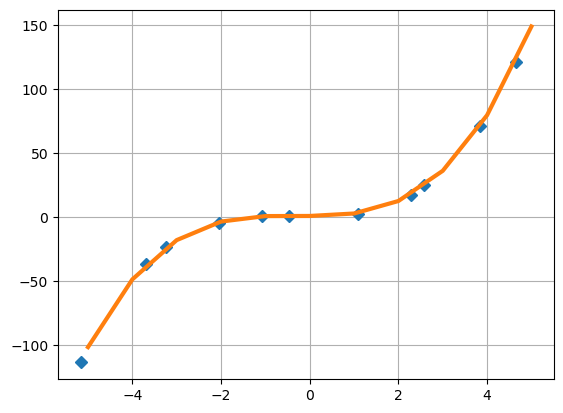

In [10]:
y = x**3 + x**2 + delta * (rand(11) - 0.5) * x + delta * (rand(11) - 0.5)

m = np.vstack((x**3, x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(-5, 5, 11)
plt.plot(x, y, "D")
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()

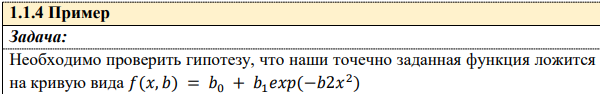

In [11]:
#добавим шума в данные, сделанные по функции f(x, b) с коэф-ми b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)

#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

#используем функцию для получения решения в виде коэф-тов f(x) для указанных xdata, ydata
#from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt

array([0.25901331, 0.78825438, 0.56744123])

In [12]:
#вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

0.00020708302293555604
0.10703933377679399


In [13]:
print(xdata)
print(ydata)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.08575335 1.00919658 1.05360898 1.05372915 0.97030679 0.91755247
 0.84100026 0.8653754  0.76138804 0.6475105  0.78308697 0.64503534
 0.57036312 0.67032179 0.4962866  0.44418858 0.38254937 0.42765754
 0.42244756 0.37569797 0.29696928 0.29668612 0.27043617 0.31297673
 0.27824479 0.27752268 0.26468902 0.28115666 0.27302892 0.25234656
 0.25716361 0.20747713 0.28334743 0.25248533 0.33734964 0.22181746
 0.25665668 0.17669587 0.27266775 0.23

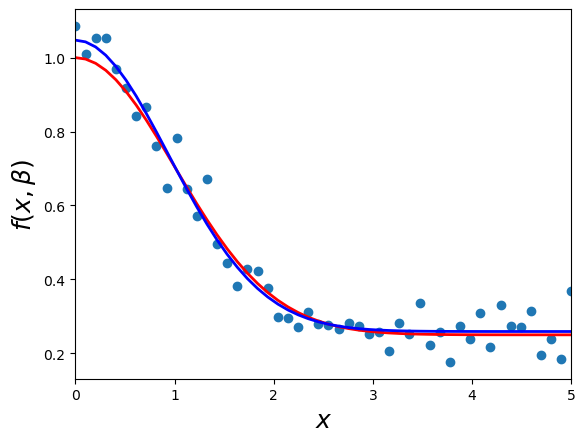

In [14]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, "r", lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

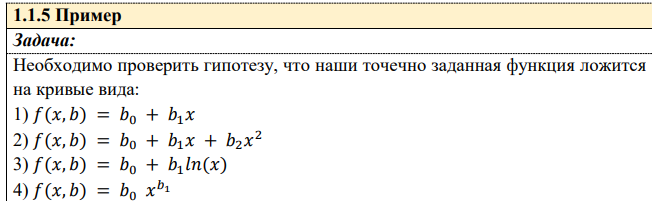

[0.24657419 0.74948788]
0.00011867507717630799
0.10435222493217232


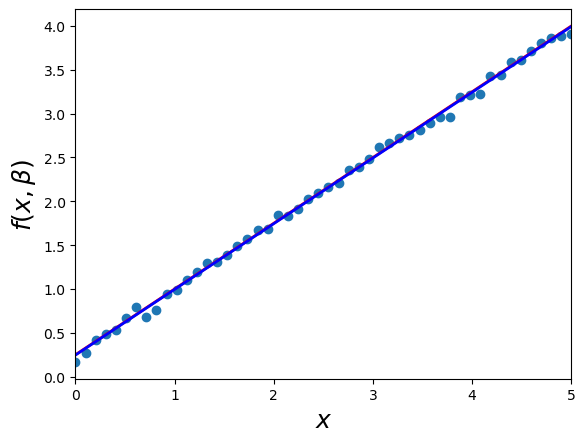

In [15]:
#1
#добавим шума в данные, сделанные по функции f(x, b) с коэф-ми b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)

#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

#используем функцию для получения решения в виде коэф-тов f(x) для указанных xdata, ydata
#from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

#вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, "r", lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[0.19729142 0.78338548 0.49550687]
0.00011947490101774249
0.09962955275964334


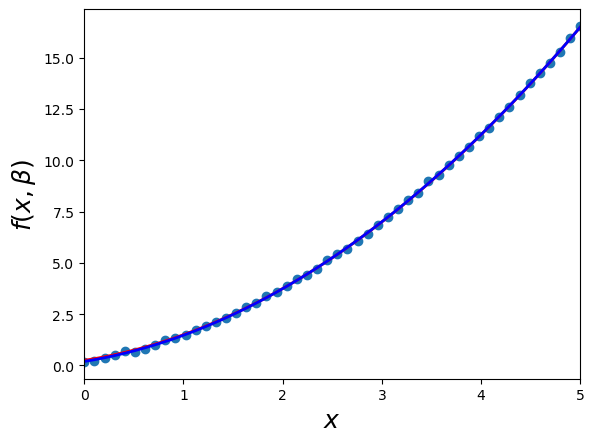

In [16]:
#2
#добавим шума в данные, сделанные по функции f(x, b) с коэф-ми b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)

#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

#используем функцию для получения решения в виде коэф-тов f(x) для указанных xdata, ydata
#from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

#вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, "r", lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[1.03242082 1.98254571]
4.352758256097498e-05
0.1006549824967299


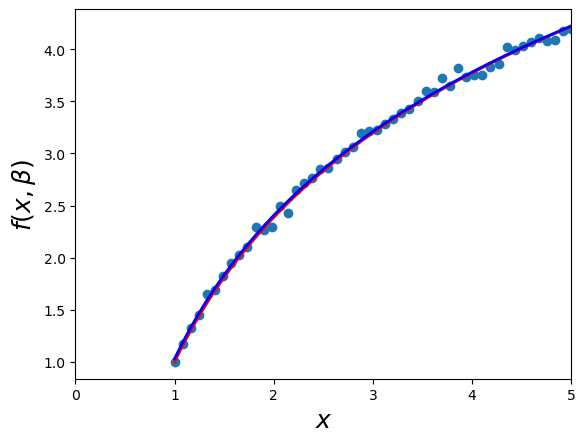

In [17]:
#3
#добавим шума в данные, сделанные по функции f(x, b) с коэф-ми b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
#зададим массив точек xi
xdata = np.linspace(1, 5, 50)

#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

#используем функцию для получения решения в виде коэф-тов f(x) для указанных xdata, ydata
#from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

#вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, "r", lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[1.00208997 1.99988899]
6.198074814917876e-05
0.08641156524276344


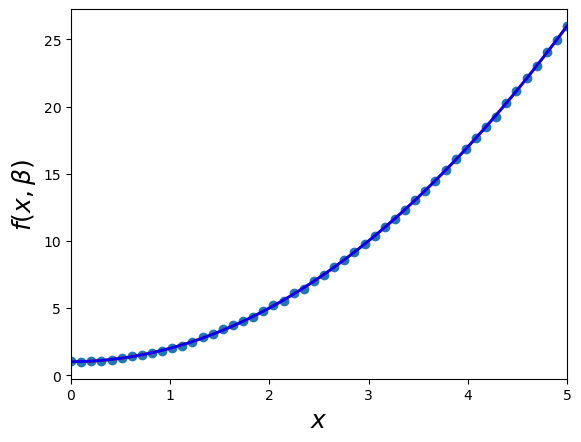

In [18]:
#4
#добавим шума в данные, сделанные по функции f(x, b) с коэф-ми b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + x**b1
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)

#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

#используем функцию для получения решения в виде коэф-тов f(x) для указанных xdata, ydata
#from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

#вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, "r", lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

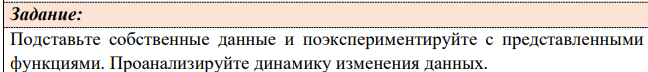

[0.98336414 2.00177979]
0.00021462733980984812
0.03777103285418806


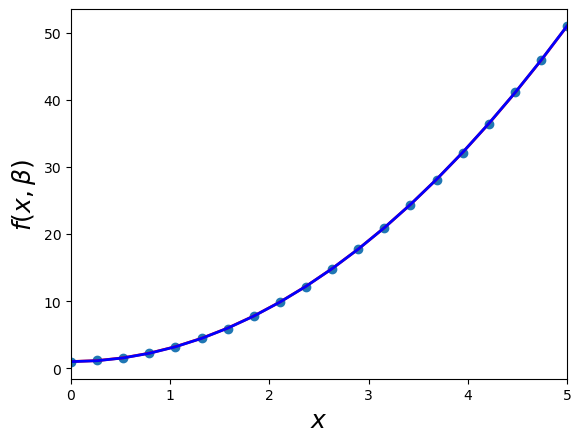

In [19]:
#добавим шума в данные, сделанные по функции f(x, b) с коэф-ми b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * x**2
#зададим массив точек xi
xdata = np.linspace(0, 5, 20)

#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

#используем функцию для получения решения в виде коэф-тов f(x) для указанных xdata, ydata
#from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

#вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, "r", lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

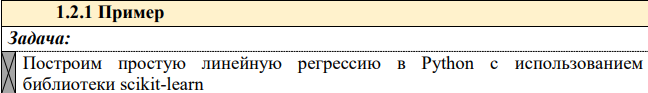

In [20]:
#импортируем необходимые библиотеки 
#pandas, numpy для обработки данных
#matplotlib для визуализации
#sklearn для обучения наборов данных и импорта моделей
import pandas as pd
import numpy as np
import matplotlib.pyplot as pls
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
#создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict = {'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
          'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}
dataset = DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [22]:
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


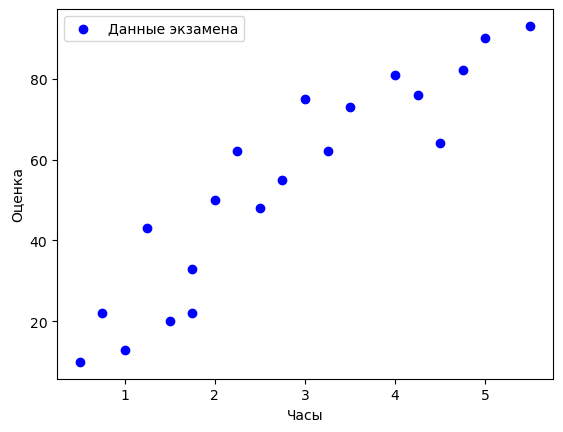

In [23]:
plt.scatter(dataset['Учебное время'], dataset['Оценка'], c = 'b', label = "Данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.legend()
plt.show()

In [24]:
X = dataset.iloc[:, :-1].values #время - атрибут (независ.перемен)
y = dataset.iloc[:, 1].values #оценки - метка (будем предсказывать)
print(X)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [25]:
#разделим атрибуты и метки на обучающий и тестовый наборы
#80% обучающий, 20% - тестовый
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#теперь можно обучить алгоритм линейной регрессии
regression = LinearRegression()
regression.fit(X_train, y_train)

#получившиеся коэффициенты для линии регрессии
print(regression.intercept_)
print(regression.coef_)

5.475400029908791
[17.02706744]


In [26]:
y_pred = regression.predict(X_test)
#сравним фактические значения с прогнозируемыми
df = DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


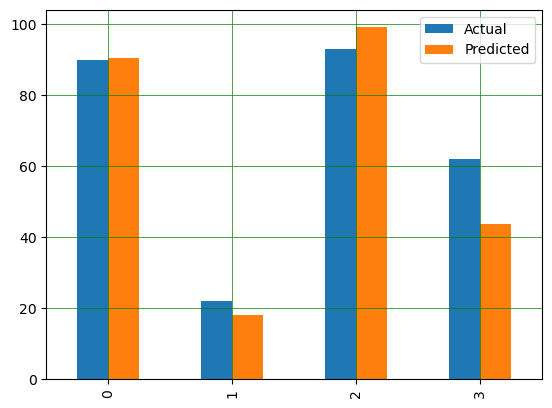

In [27]:
#визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', c='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', c='black')
plt.show()

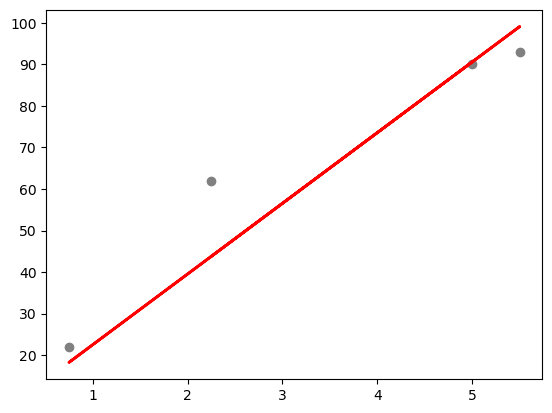

In [28]:
#построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, c='gray')
plt.plot(X_test, y_pred, c='r', linewidth=2)
plt.show()

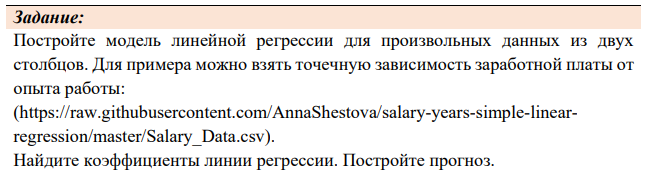

In [29]:
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
df = pd.read_csv(url)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [30]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regression = LinearRegression()
regression.fit(X_train, y_train)

print(regression.intercept_)
print(regression.coef_)

y_pred = regression.predict(X_test)
df_pred = DataFrame({"Actual": y_test, "Predict": y_pred})
df_pred

26780.09915062818
[9312.57512673]


,Actual,Predict
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


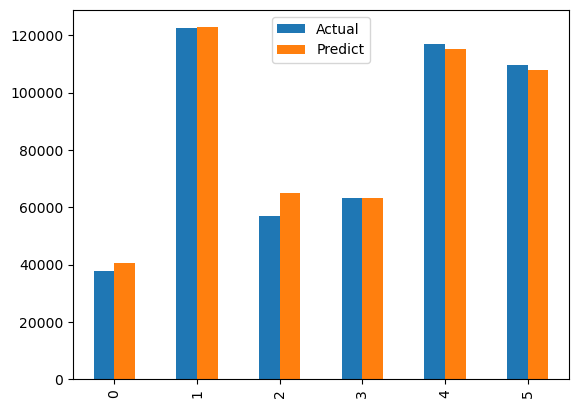

In [31]:
df_pred.plot(kind='bar')
plt.show()

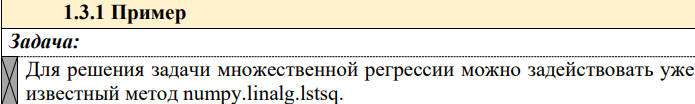

In [32]:
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]] 
X = np.transpose(X)
X = np.c_[X, np.ones(X.shape[0])]
linreg  = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


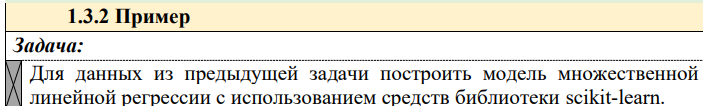

In [33]:
import seaborn 
from sklearn import metrics

In [34]:
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]] 
#формируем датафрейм из 2 списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat(frames, axis=1, join="inner")
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [35]:
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [36]:
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

regression = LinearRegression()
regression.fit(X_train, y_train)

coeff_df = DataFrame(regression.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [37]:
y_pred = regression.predict(X_test)
df = DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [38]:
#Оценка производительности алгоритма. Сделаем это, найдя значения для MSE
print("Mean squared error: ", metrics.mean_squared_error(y_test, y_pred))

Mean squared error:  1.327269924234307


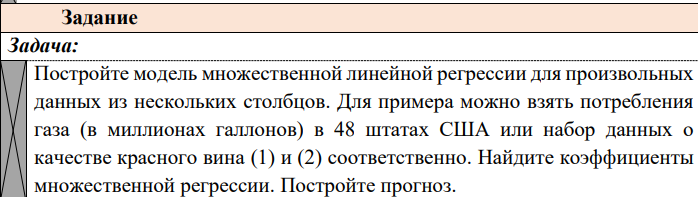

In [39]:
url2 = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"

df = pd.read_csv(url2)

X = df.iloc[:, :-1]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

regression = LinearRegression()
regression.fit(X_train, y_train)

coeff_df = DataFrame(regression.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [40]:
y_pred = regression.predict(X_test)
df_pred = DataFrame({"Actual": y_test, "Predicted": y_pred})
df_pred

,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
...,...,...
794,6,6.559757
813,4,6.017576
1322,5,6.251291
704,4,5.163926


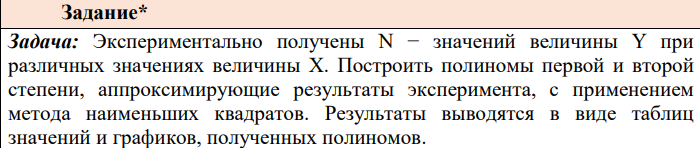

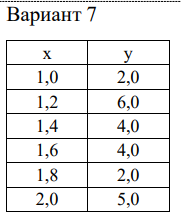

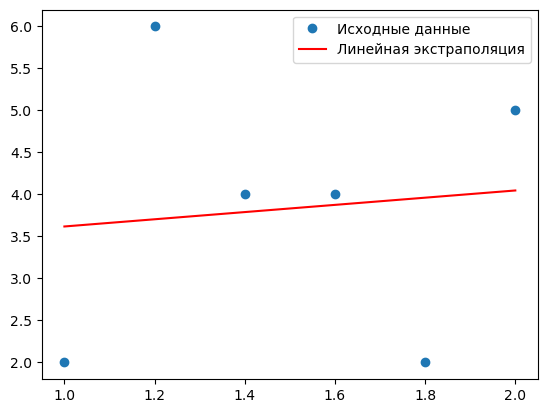

In [41]:
x = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
y = np.array([2.0, 6.0, 4.0, 4.0, 2.0, 5.0])

#1 y = kx + b
m = np.vstack((x, np.ones(6))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
plt.plot(x, y, "o", label = "Исходные данные")
plt.plot(x, s[0] * x + s[1], c='r', label = "Линейная экстраполяция")
plt.legend()
plt.show()

In [42]:
df1 = pd.DataFrame({'x': x, 
                    'y': y,
                    'y_line': s[0] * x + s[1]})
df1

,x,y,y_line
0,1.0,2.0,3.619048
1,1.2,6.0,3.704762
2,1.4,4.0,3.790476
3,1.6,4.0,3.876190
4,1.8,2.0,3.961905
5,2.0,5.0,4.047619


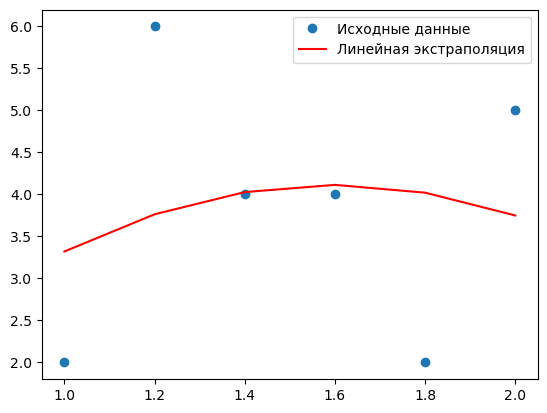

In [43]:
#2 y = ax^2 + bx + c
m = np.vstack((x**2, x, np.ones(6))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
plt.plot(x, y, "o", label = "Исходные данные")
plt.plot(x, s[0] * x**2 + s[1] * x + s[2], c='r', label = "Линейная экстраполяция")
plt.legend()
plt.show()

In [44]:
df2 = pd.DataFrame({'x': x, 
                    'y': y,
                    'y_line': s[0] * x**2 + s[1] * x + s[2]})
df2

,x,y,y_line
0,1.0,2.0,3.321429
1,1.2,6.0,3.764286
2,1.4,4.0,4.028571
3,1.6,4.0,4.114286
4,1.8,2.0,4.021429
5,2.0,5.0,3.750000
